In [39]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from sklearn.linear_model import LinearRegression

%matplotlib inline


## Exploratory data analysis 
1st plot

In [40]:
df_raw = pd.read_csv('temp_datalab_records_social_facebook.csv')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 14 columns):
dataset_id             1048575 non-null int64
time                   1048575 non-null object
username               1016104 non-null object
checkins               1048575 non-null int64
has_added_app          1048575 non-null object
were_here_count        1048575 non-null int64
likes                  1048575 non-null int64
talking_about_count    1048575 non-null int64
facebook_id            1048575 non-null float64
date_added             0 non-null float64
date_updated           1047387 non-null object
entity_id              0 non-null float64
cusip                  0 non-null float64
isin                   0 non-null float64
dtypes: float64(5), int64(5), object(4)
memory usage: 112.0+ MB


In [4]:
df_raw.head()

,dataset_id,time,username,checkins,has_added_app,were_here_count,likes,talking_about_count,facebook_id,date_added,date_updated,entity_id,cusip,isin
0,53088,2015-01-01 05:00:00+00,SodaStream,0,f,0,761533,587,5.488562e+10,NaN,2017-02-14 03:35:13.236826+00,NaN,NaN,NaN
1,52642,2015-01-01 05:00:00+00,ANSYSInc,148,f,0,43442,1305,1.602420e+14,NaN,2017-02-14 01:55:52.78506+00,NaN,NaN,NaN
2,53656,2015-01-01 05:00:00+00,MyAquaAmerica,0,f,0,5591,297,5.916940e+14,NaN,2017-02-14 08:13:51.267343+00,NaN,NaN,NaN
3,53033,2015-01-01 05:00:00+00,Qualcomm,173,f,0,1232521,2685,1.084730e+11,NaN,2017-02-14 03:24:04.363035+00,NaN,NaN,NaN
4,52783,2015-01-01 05:00:00+00,eaglepharmaceuticals,0,f,0,18,0,1.428270e+15,NaN,2017-02-14 02:22:10.193588+00,NaN,NaN,NaN


In [20]:
df_raw.shape

(1048575, 14)

In [12]:
# look all the data in each column
for column in df_raw.columns:
    print('Column name:', column)
    print(df_raw[column].value_counts().head(1), df_raw[column].value_counts().shape)
    print('*-'*25)
    
# the last five columns are not very importantly
# most important columns are [time, username, checkins, were_here_count, likes, talking_about_count, facebook_id]


Column name: dataset_id
53110    605
Name: dataset_id, dtype: int64 (3165,)
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Column name: time
2016-09-24 04:00:00+00    3105
Name: time, dtype: int64 (605,)
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Column name: username
SevernSavingsBank    605
Name: username, dtype: int64 (3163,)
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Column name: checkins
0    457678
Name: checkins, dtype: int64 (46817,)
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Column name: has_added_app
f    1048575
Name: has_added_app, dtype: int64 (1,)
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Column name: were_here_count
0    659789
Name: were_here_count, dtype: int64 (93661,)
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Column name: likes
44    459
Name: likes, dtype: int64 (396011,)
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Column name: talking_about_count
0    19860
Name: talking_about_count, dtype: int64 (70646,)
*-*-*-*

In [28]:
df_raw['username'].value_counts().head()

SevernSavingsBank    605
edaptmscompany       605
gpstrategies         605
MicrovisionInc       605
Equifax              605
Name: username, dtype: int64

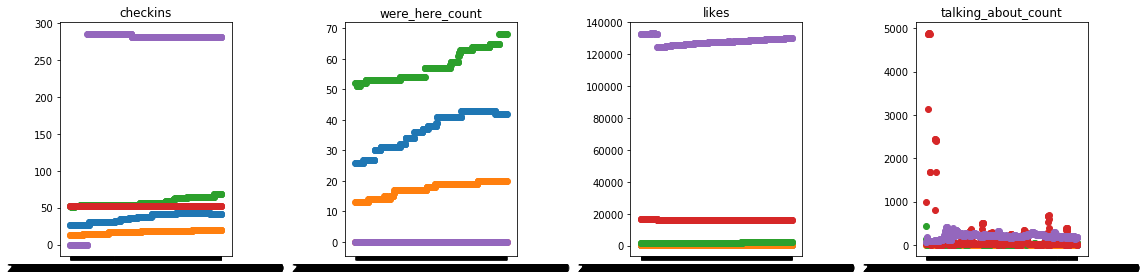

In [47]:
# we pick five companies which have largest dataset_id available
# Q1: plot the columns_properties vs time to visualize how the properties change with time

fig, axes = plt.subplots(1,4, figsize = (16,4))

top_five_company = ['SevernSavingsBank', 'edaptmscompany', 'gpstrategies', 'MicrovisionInc', 'Equifax']
columns_des = ['checkins', 'were_here_count', 'likes', 'talking_about_count']

# five colors show different companies
for j, column in enumerate(columns_des):
    for i, company in enumerate(top_five_company):
        subdf = df_raw[df_raw['username'] == company]
        axes[j].scatter(subdf['time'], subdf[column]) #, color = colors[company])
        axes[j].set_title(column)
#         axes[i,j].set_xticklabels(axes[i,j].get_xticklabels(), rotation = 45)
    
fig.tight_layout()
plt.show()

# 

Company Name: SevernSavingsBank


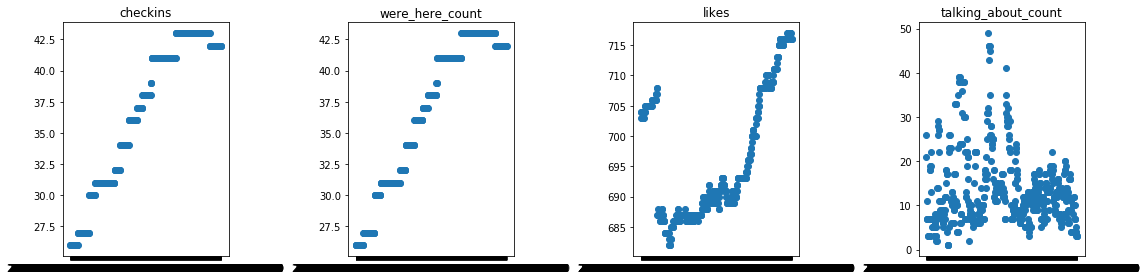

Company Name: edaptmscompany


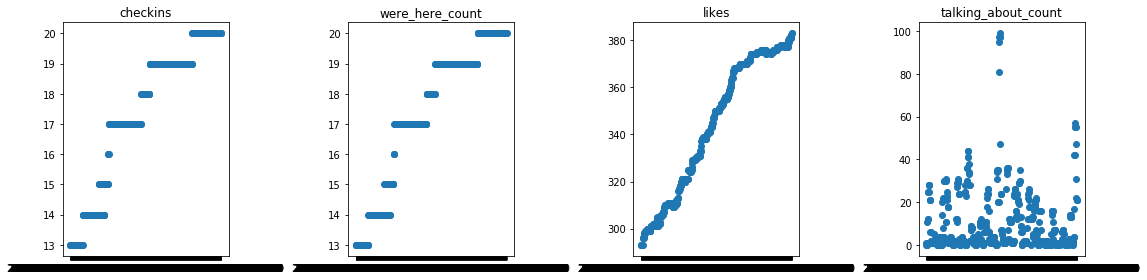

Company Name: gpstrategies


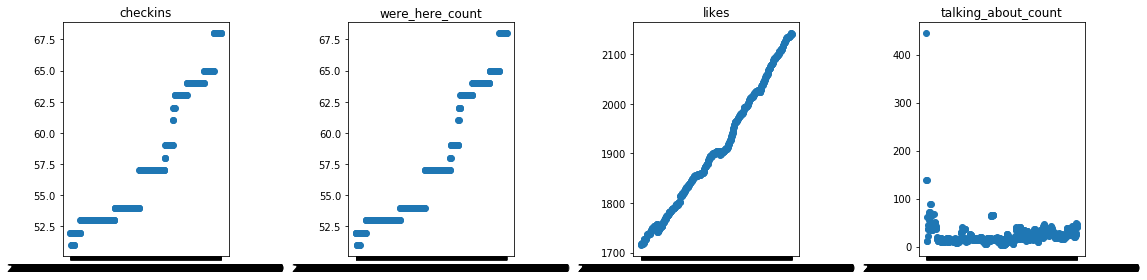

Company Name: MicrovisionInc


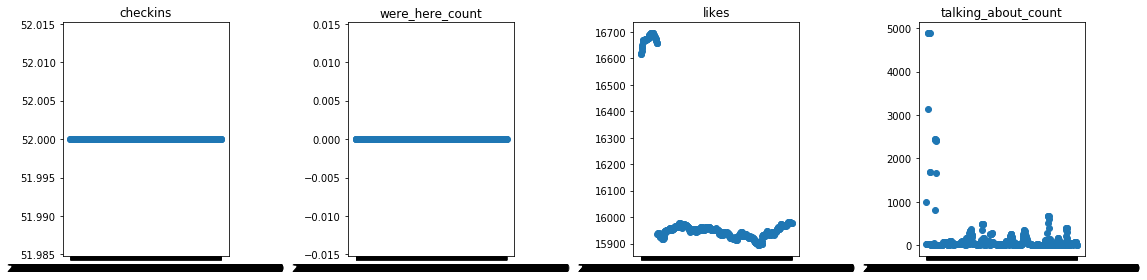

Company Name: Equifax


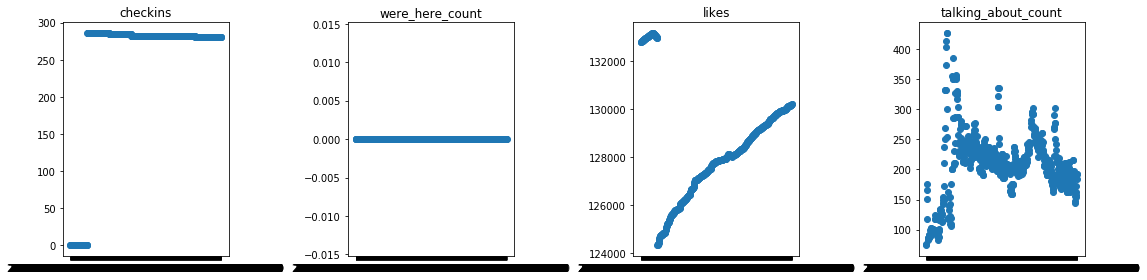

In [45]:
# we pick five companies which have largest dataset_id available
# For each company
# plot the columns_properties vs time to visualize how the properties correlate with each other.


top_five_company = ['SevernSavingsBank', 'edaptmscompany', 'gpstrategies', 'MicrovisionInc', 'Equifax']

for i, company in enumerate(top_five_company):
    subdf = df_raw[df_raw['username'] == company]
    columns_des = ['checkins', 'were_here_count', 'likes', 'talking_about_count']
    print('Company Name:', company)
    fig, axes = plt.subplots(1,4, figsize = (16,4))
    for j, column in enumerate(columns_des):
        
        axes[j].scatter(subdf['time'], subdf[column]) #, color = colors[company])
        axes[j].set_title(column)
#         axes[i,j].set_xticklabels(axes[i,j].get_xticklabels(), rotation = 45)
    fig.tight_layout()
    plt.show()